In [ ]:
# In general, the max temperature gets higher when cities are closer to the equator  
# The vast majority of cities are located in areas where wind speed is less than 15 mph, regardless of latitude. 
# Cloudiness levels, although vary in a wide range, can be found in cities located in any latitude.

In [64]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint

# Import API key
from config import apikey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [65]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

## Perform API Calls

In [66]:
# OpenWeatherMap API Key
api_key = apikey

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 


In [67]:
citydf=pd.DataFrame({"City":[]})
citydf["City"]=cities
print("Beginning Date Retrieval\n\
---------------------------")
for index,row in citydf.iterrows():
    surl=url+"&q="+row["City"]
    response=requests.get(surl).json()
    print(f'Processing Rerord {index % 50} of set {1+index//50} | {row["City"]}\n\
    {str(surl)}') 
    try:
        citydf.loc[index,"Cloudiness"]=response["clouds"]["all"]
    except:
        pass
    try:
        citydf.loc[index,"Country"]=response["sys"]["country"]
    except:
        pass
    try:
        citydf.loc[index,"Cloudiness"]=response["clouds"]["all"]
    except:
        pass
    try:
        citydf.loc[index,"Date"]=response["dt"]
    except:
        pass
    try:
        citydf.loc[index,"Humidity"]=response["main"]["humidity"]
    except:
        pass
    try:
        citydf.loc[index,"Lat"]=response["coord"]["lat"]
    except:
        pass
    try:
        citydf.loc[index,"Lat"]=response["coord"]["lat"]
    except:
        pass
    try:
        citydf.loc[index,"Lng"]=response["coord"]["lon"]
    except:
        pass
    try:
        citydf.loc[index,"Max Temp"]=response["main"]["temp_max"]
    except:
        pass
    try:
        citydf.loc[index,"Wind Speed"]=response["wind"]["speed"]
    except:
        pass
citydf=citydf.dropna(how="any")

Beginning Date Retrieval
---------------------------
Processing Rerord 0 of set 1 | sangar
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=sangar
Processing Rerord 1 of set 1 | kindersley
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=kindersley
Processing Rerord 2 of set 1 | punta arenas
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=punta arenas
Processing Rerord 3 of set 1 | saint george
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=saint george
Processing Rerord 4 of set 1 | saint-philippe
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=saint-philippe
Processing Rerord 5 of set 1 | mahebourg
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf8795

Processing Rerord 2 of set 2 | yellowknife
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=yellowknife
Processing Rerord 3 of set 2 | camacha
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=camacha
Processing Rerord 4 of set 2 | phan thiet
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=phan thiet
Processing Rerord 5 of set 2 | carnarvon
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=carnarvon
Processing Rerord 6 of set 2 | suhbaatar
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=suhbaatar
Processing Rerord 7 of set 2 | tautira
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=tautira
Processing Rerord 8 of set 2 | mar del plata
    http:

Processing Rerord 6 of set 3 | kavieng
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=kavieng
Processing Rerord 7 of set 3 | avarua
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=avarua
Processing Rerord 8 of set 3 | nikolskoye
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=nikolskoye
Processing Rerord 9 of set 3 | mareeba
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=mareeba
Processing Rerord 10 of set 3 | manono
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=manono
Processing Rerord 11 of set 3 | liloan
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=liloan
Processing Rerord 12 of set 3 | palauig
    http://api.openweathermap.org/

Processing Rerord 9 of set 4 | vitre
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=vitre
Processing Rerord 10 of set 4 | rio de jesus
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=rio de jesus
Processing Rerord 11 of set 4 | te anau
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=te anau
Processing Rerord 12 of set 4 | kuznechikha
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=kuznechikha
Processing Rerord 13 of set 4 | ta khmau
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=ta khmau
Processing Rerord 14 of set 4 | bethel
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=bethel
Processing Rerord 15 of set 4 | ambilobe
    http://api.o

Processing Rerord 12 of set 5 | motygino
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=motygino
Processing Rerord 13 of set 5 | bubaque
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=bubaque
Processing Rerord 14 of set 5 | atambua
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=atambua
Processing Rerord 15 of set 5 | clarence town
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=clarence town
Processing Rerord 16 of set 5 | asyut
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=asyut
Processing Rerord 17 of set 5 | ondorhaan
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=ondorhaan
Processing Rerord 18 of set 5 | ketchikan
    http://api

Processing Rerord 14 of set 6 | corrales
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=corrales
Processing Rerord 15 of set 6 | vaitupu
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=vaitupu
Processing Rerord 16 of set 6 | acapulco
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=acapulco
Processing Rerord 17 of set 6 | flinders
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=flinders
Processing Rerord 18 of set 6 | rungata
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=rungata
Processing Rerord 19 of set 6 | san andres
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=san andres
Processing Rerord 20 of set 6 | georgetown
    http://api.

Processing Rerord 17 of set 7 | omboue
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=omboue
Processing Rerord 18 of set 7 | itoman
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=itoman
Processing Rerord 19 of set 7 | shenjiamen
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=shenjiamen
Processing Rerord 20 of set 7 | hualmay
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=hualmay
Processing Rerord 21 of set 7 | kingaroy
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=kingaroy
Processing Rerord 22 of set 7 | parrsboro
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=parrsboro
Processing Rerord 23 of set 7 | haverfordwest
    http://api.o

Processing Rerord 20 of set 8 | lyngseidet
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=lyngseidet
Processing Rerord 21 of set 8 | meiganga
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=meiganga
Processing Rerord 22 of set 8 | druskininkai
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=druskininkai
Processing Rerord 23 of set 8 | manyana
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=manyana
Processing Rerord 24 of set 8 | east london
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=east london
Processing Rerord 25 of set 8 | kikwit
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=kikwit
Processing Rerord 26 of set 8 | shumikha
    h

Processing Rerord 23 of set 9 | vanimo
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=vanimo
Processing Rerord 24 of set 9 | natal
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=natal
Processing Rerord 25 of set 9 | guozhen
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=guozhen
Processing Rerord 26 of set 9 | galle
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=galle
Processing Rerord 27 of set 9 | artyk
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=artyk
Processing Rerord 28 of set 9 | creston
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=creston
Processing Rerord 29 of set 9 | oktyabrskiy
    http://api.openweathermap.org/data/2

Processing Rerord 27 of set 10 | cabedelo
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=cabedelo
Processing Rerord 28 of set 10 | bulgan
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=bulgan
Processing Rerord 29 of set 10 | juneau
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=juneau
Processing Rerord 30 of set 10 | wanlaweyn
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=wanlaweyn
Processing Rerord 31 of set 10 | saint anthony
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=saint anthony
Processing Rerord 32 of set 10 | mazagao
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=mazagao
Processing Rerord 33 of set 10 | yining
    http:/

Processing Rerord 30 of set 11 | wukari
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=wukari
Processing Rerord 31 of set 11 | zhigansk
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=zhigansk
Processing Rerord 32 of set 11 | maraa
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=maraa
Processing Rerord 33 of set 11 | tubruq
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=tubruq
Processing Rerord 34 of set 11 | ashcroft
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=ashcroft
Processing Rerord 35 of set 11 | gravatai
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=gravatai
Processing Rerord 36 of set 11 | san cristobal
    http://api.open

Processing Rerord 32 of set 12 | tagusao
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=tagusao
Processing Rerord 33 of set 12 | gurgan
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=gurgan
Processing Rerord 34 of set 12 | okhotsk
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=okhotsk
Processing Rerord 35 of set 12 | belica
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=belica
Processing Rerord 36 of set 12 | sindor
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=sindor
Processing Rerord 37 of set 12 | kamaishi
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46f36bfe8063e7ba8edacf879513fc07&q=kamaishi
Processing Rerord 38 of set 12 | bonthe
    http://api.openweatherma

In [68]:
citydf.count()

City          570
Cloudiness    570
Country       570
Date          570
Humidity      570
Lat           570
Lng           570
Max Temp      570
Wind Speed    570
dtype: int64

In [69]:
citydf.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,sangar,8.0,RU,1.547271e+09,49.0,63.92,127.47,-30.04,2.82
1,kindersley,20.0,CA,1.547269e+09,85.0,51.47,-109.16,12.20,18.34
2,punta arenas,75.0,CL,1.547269e+09,75.0,-53.16,-70.91,41.00,23.04
3,saint george,90.0,GR,1.547267e+09,93.0,39.45,22.34,35.60,8.05
4,saint-philippe,1.0,CA,1.547269e+09,59.0,45.36,-73.48,3.56,13.87


In [70]:
citydf.to_csv("cityweather.csv",index=False,header=True)

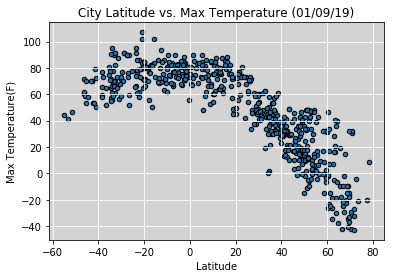

In [84]:
latemp=citydf.plot(kind="scatter",x="Lat",y="Max Temp",facecolors="navy",edgecolors="black",title="City Latitude vs. Max Temperature (01/09/19)")
latemp.set_facecolor("lightgrey")
latemp.grid(color="white")
latemp.set_xlabel("Latitude")
latemp.set_ylabel("Max Temperature(F)")
plt.savefig("temperature.png")

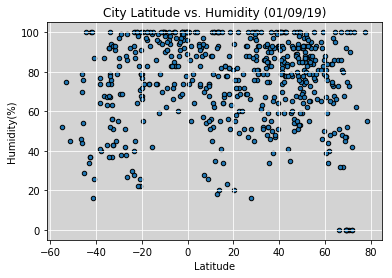

In [88]:
lathum=citydf.plot(kind="scatter",x="Lat",y="Humidity",facecolors="navy",edgecolors="black",title="City Latitude vs. Humidity (01/09/19)")
lathum.set_facecolor("lightgrey")
lathum.grid(color="white")
lathum.set_xlabel("Latitude")
lathum.set_ylabel("Humidity(%)")
plt.savefig("humidity.png")



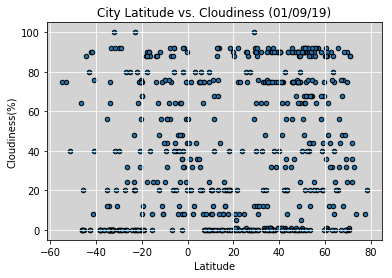

In [87]:
latcloud=citydf.plot(kind="scatter",x="Lat",y="Cloudiness",facecolors="navy",edgecolors="black",title="City Latitude vs. Cloudiness (01/09/19)")
latcloud.set_facecolor("lightgrey")
latcloud.grid(color="white")
latcloud.set_xlabel("Latitude")
latcloud.set_ylabel("Cloudiness(%)")
plt.savefig("cloudiness.png")


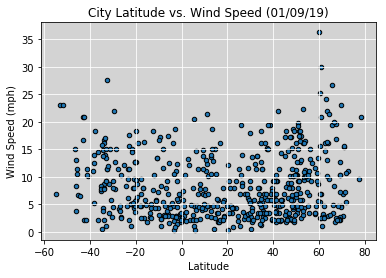

In [83]:
latcloud=citydf.plot(kind="scatter",x="Lat",y="Wind Speed",facecolors="navy",edgecolors="black",title="City Latitude vs. Wind Speed (01/09/19)")
latcloud.set_facecolor("lightgrey")
latcloud.grid(color="white")
latcloud.set_xlabel("Latitude")
latcloud.set_ylabel("Wind Speed (mph)")
plt.savefig("windspeed.png")

